# EXPLORE PROGRAMMING

In [1]:
from src.make_lti_crn import makeLtiCrn
from src.model import Model
from src.jacobian import Jacobian
from src.subsystem import Subsystem
from src.merge_models import mergeModels

import libsbml
import numpy as np
import pandas as pd
import random
import sympy as sp
import tellurium as te

# Helpers

In [2]:
def plotModel(antimony_str, start=0, end=10):
    rr = te.loada(antimony_str)
    rr.simulate(start, end, 10*end)
    rr.plot()

# Symbolic Solution of Linear Systems

In [3]:
model_str = makeLtiCrn(num_species=5,
                is_input_boundary=True, 
                num_reaction=10,
                num_products_bounds=(1, 2),
                kinetic_constant_bounds= (0.1, 1),
                stoichiometry_bounds=(1, 3),
                input_species_indices=[1])
print(model_str)

# Random Chemical Reaction Network
# Generated with specified constraints

model random_crn()

  # Species
  species S1_;
  species S4_;
  species S5_;
  species S3_;
  species S2_;

  J1: S2_ -> 2 S4_ + S4_; k1 * S2_
  J2: S1_ -> 3 S2_ + 3 S4_; k2 * S1_
  J3: S5_ -> 3 S4_ + 3 S2_; k3 * S5_
  J4: S4_ -> 2 S5_ + 3 S5_; k4 * S4_
  J5: S2_ -> 2 S4_; k5 * S2_
  J6: S2_ -> 3 S2_; k6 * S2_
  J7: S1_ -> 2 S5_; k7 * S1_
  J8: S3_ -> S3_ + 2 S3_; k8 * S3_
  J9: S2_ -> 3 S4_; k9 * S2_
  J10: S5_ -> S5_; k10 * S5_

  # Rate constants
  k1 = 0.8274
  k2 = 0.1552
  k3 = 0.1390
  k4 = 0.4518
  k5 = 0.9791
  k6 = 0.2246
  k7 = 0.3193
  k8 = 0.4133
  k9 = 0.1048
  k10 = 0.4826

  # Species initialization
  $S1_ = 1  # Input boundary species
  S2_ = 0
  S3_ = 0
  S4_ = 0
  S5_ = 0


  # Degradation reactions
  JD0: S4_ -> ; kd_0 * S4_
  kd_0 = 5.1920
  JD1: S5_ -> ; kd_1 * S5_
  kd_1 = 2.3320
  JD2: S3_ -> ; kd_2 * S3_
  kd_2 = 0.9093
end


In [4]:
model = Model(model_str.replace("$", ""))
jacobian = Jacobian(model)

species_name = "S1_"
species_idx = model.getSpeciesIndex(species_name)
b_smat = jacobian.b_smat
# Construct the A' matrix and c vector
Ap_smat = jacobian.jacobian_smat.copy()
Ap_smat[species_idx, :] = sp.Matrix.zeros(1, model.num_species)
Ap_smat = Ap_smat[:, [i for i in range(model.num_species) if i != species_idx]]
b_smat[species_idx] = 0
c_smat = jacobian.jacobian_smat[:, species_idx]
c_smat = sp.Matrix.zeros(model.num_species, 1) - c_smat
# Solve for steady-state
x_solns = [sp.Symbol(f"x{n}_ss") for n in range(2, model.num_species+1)]
#x2_ss,x3_ss, x4_ss = sp.symbols("x2_ss,x3_ss, x4_ss")
#x_ss = sp.Matrix([x2_ss, x3_ss, x4_ss])
x_ss = sp.Matrix(x_solns)
solution = sp.solve(Ap_smat * x_ss + b_smat - c_smat, x_solns)
solution

{x2_ss: (-3.0*k2*k3*k4 - 3.0*k2*k3*kd_0 - 3.0*k2*k4*kd_1 - 3.0*k2*kd_0*kd_1 - 6.0*k3*k4*k7 - 6.0*k3*k7*kd_0)/(59.0*k1*k3*k4 - k1*k3*kd_0 - k1*k4*kd_1 - k1*kd_0*kd_1 + 44.0*k3*k4*k5 - 28.0*k3*k4*k6 + 59.0*k3*k4*k9 - k3*k5*kd_0 + 2.0*k3*k6*kd_0 - k3*k9*kd_0 - k4*k5*kd_1 + 2.0*k4*k6*kd_1 - k4*k9*kd_1 - k5*kd_0*kd_1 + 2.0*k6*kd_0*kd_1 - k9*kd_0*kd_1),
 x3_ss: 0.0,
 x4_ss: (-12.0*k1*k2*k3 - 12.0*k1*k2*kd_1 - 24.0*k1*k3*k7 - 9.0*k2*k3*k5 + 6.0*k2*k3*k6 - 12.0*k2*k3*k9 - 9.0*k2*k5*kd_1 + 6.0*k2*k6*kd_1 - 12.0*k2*k9*kd_1 - 18.0*k3*k5*k7 + 12.0*k3*k6*k7 - 24.0*k3*k7*k9)/(59.0*k1*k3*k4 - k1*k3*kd_0 - k1*k4*kd_1 - k1*kd_0*kd_1 + 44.0*k3*k4*k5 - 28.0*k3*k4*k6 + 59.0*k3*k4*k9 - k3*k5*kd_0 + 2.0*k3*k6*kd_0 - k3*k9*kd_0 - k4*k5*kd_1 + 2.0*k4*k6*kd_1 - k4*k9*kd_1 - k5*kd_0*kd_1 + 2.0*k6*kd_0*kd_1 - k9*kd_0*kd_1),
 x5_ss: (-60.0*k1*k2*k4 - 2.0*k1*k4*k7 - 2.0*k1*k7*kd_0 - 45.0*k2*k4*k5 + 30.0*k2*k4*k6 - 60.0*k2*k4*k9 - 2.0*k4*k5*k7 + 4.0*k4*k6*k7 - 2.0*k4*k7*k9 - 2.0*k5*k7*kd_0 + 4.0*k6*k7*kd_0 - 2.0*k7

In [5]:
jacobian.jacobian_smat

Matrix([
[-1.0*k2 - 1.0*k7,                                  0,                 0,                  0,                  0],
[          3.0*k2, -1.0*k1 - 1.0*k5 + 2.0*k6 - 1.0*k9,                 0,                  0,             3.0*k3],
[               0,                                  0, 2.0*k8 - 1.0*kd_2,                  0,                  0],
[          3.0*k2,           3.0*k1 + 2.0*k5 + 3.0*k9,                 0, -1.0*k4 - 1.0*kd_0,             3.0*k3],
[          2.0*k7,                                  0,                 0,             5.0*k4, -1.0*k3 - 1.0*kd_1]])

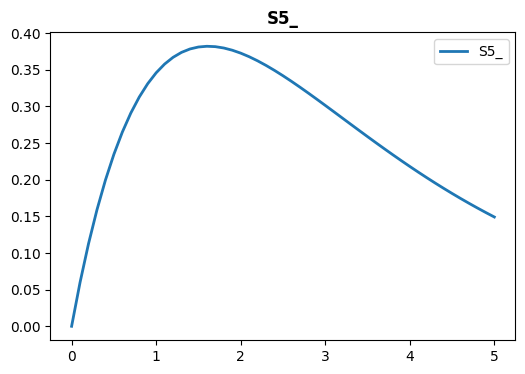

In [6]:
model.roadrunner.reset()
species_name = f"S{list(solution.keys())[-1].name[1]}_"
model.roadrunner.simulate(selections=["time", species_name])
model.roadrunner.plot(title=species_name)

# Jacobian for Paper example

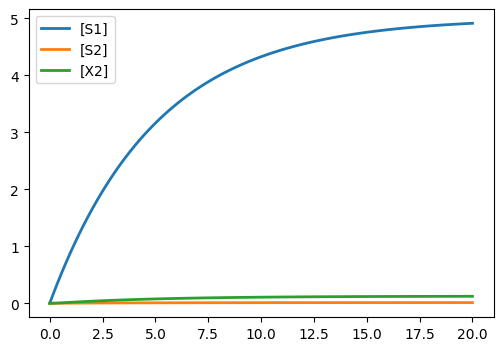

In [7]:
MODEL = """
J1: X0 -> S1; k1*X0
J2: S1 -> ; k1d*S1
J3: S1 -> S2; k2f*S1
J4: S2 -> S1; k2b*S2
J5: S2 -> X2; k3*S2
J6: X2 -> ; k4*X2
k1=1; k2=2; k3=40; k4=4; k1d=0.1; k2f=0.1; k2b=0.1
$X0=1; S1=0; S2=0; S3=3; S4=0;
"""
rr = te.loada(MODEL)
rr.simulate(0, 20, 100)
rr.plot()

In [8]:
model = Model(MODEL.replace("$",""), species_names=["X0", "S1", "S2", "X2"])
jacobian = Jacobian(model)
jacobian.jacobian_smat

Matrix([
[-1.0*k1,                  0,                 0,       0],
[ 1.0*k1, -1.0*k1d - 1.0*k2f,           1.0*k2b,       0],
[      0,            1.0*k2f, -1.0*k2b - 1.0*k3,       0],
[      0,                  0,            1.0*k3, -1.0*k4]])

In [9]:
subsystem = Subsystem(MODEL.replace("$", ""))
result_dct = subsystem.calculateSymbolicStepResponse(input_name="X0")
for k, v in result_dct.items():
    print(f"{k}: {v.__str__()}")

S1: (k1*k2b + k1*k3)/(k1d*k2b + k1d*k3 + k2f*k3)
S2: k1*k2f/(k1d*k2b + k1d*k3 + k2f*k3)
X2: k1*k2f*k3/(k1d*k2b*k4 + k1d*k3*k4 + k2f*k3*k4)
X0: 1


In [10]:
result_dct["X0"]

1

In [11]:
result_dct["S1"]

(k1*k2b + k1*k3)/(k1d*k2b + k1d*k3 + k2f*k3)

In [12]:
result_dct["S2"]

k1*k2f/(k1d*k2b + k1d*k3 + k2f*k3)

In [13]:
result_dct["X2"]

k1*k2f*k3/(k1d*k2b*k4 + k1d*k3*k4 + k2f*k3*k4)

# Branching System

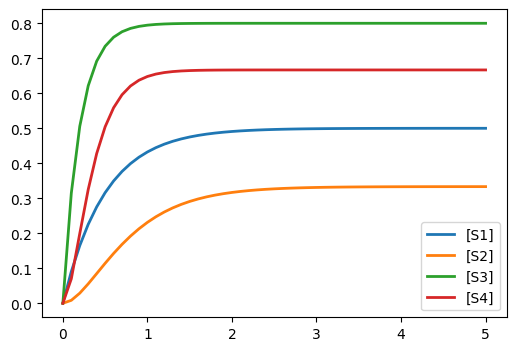

In [14]:
MODEL = """
J1: X0 -> S1; k1*X0
J2: S1 -> S2; k2*S1
J3: S2 -> ; k3*S2
J4: X0 -> S3; k4*X0
J5: S3 -> S4; k5*S3
J6: S4 -> ; k6*S4
$X0 = 1;
S1 = 0; S2=0; S3=0; S4=0;
k1=1; k2=2; k3=3; k4=4; k5=5; k6=6
"""
rr = te.loada(MODEL)
rr.simulate()
rr.plot()

In [15]:
subsystem1 = Subsystem(MODEL.replace("$", ""), reaction_names=["J1", "J2", "J3"], species_names=["X0", "S1", "S2"])
subsystem1.calculateSymbolicStepResponse(input_name="X0")

{'S1': k1/k2, 'S2': k1/k3, 'X0': 1}

In [16]:
subsystem2 = Subsystem(MODEL.replace("$", ""), reaction_names=["J4", "J5", "J6"], species_names=["X0", "S3", "S4"])
subsystem2.calculateSymbolicStepResponse(input_name="X0")

{'S3': k4/k5, 'S4': k4/k6, 'X0': 1}

In [17]:
subsystem3 = Subsystem(MODEL.replace("$", ""), reaction_names=["J1", "J2", "J3","J4", "J5", "J6"],
                       species_names=["X0", "S3", "S4", "S1", "S2"])
subsystem3.calculateSymbolicStepResponse(input_name="X0")

{'S1': k1/k2, 'S2': k1/k3, 'S3': k4/k5, 'S4': k4/k6, 'X0': 1}

# Random Chemical Reaction Network
# Generated with specified constraints

model random_crn()

  # Species
  species S1_;
  species S4_;
  species S5_;
  species S3_;
  species S2_;

  J1: S5_ -> 3 S4_; k1 * S5_
  J2: S1_ -> 3 S4_ + 3 S3_; k2 * S1_
  J3: S3_ -> 2 S5_ + 2 S4_; k3 * S3_
  J4: S2_ -> 2 S4_ + 2 S3_; k4 * S2_
  J5: S1_ -> S5_ + 2 S4_; k5 * S1_
  J6: S5_ -> 3 S3_ + 3 S5_; k6 * S5_
  J7: S4_ -> 2 S4_; k7 * S4_
  J8: S3_ -> 2 S3_ + 3 S3_; k8 * S3_
  J9: S1_ -> 2 S3_ + 3 S3_; k9 * S1_
  J10: S4_ -> S2_ + S2_; k10 * S4_

  # Rate constants
  k1 = 0.6953
  k2 = 0.4864
  k3 = 0.1105
  k4 = 0.8787
  k5 = 0.7538
  k6 = 0.1220
  k7 = 0.1222
  k8 = 0.5004
  k9 = 0.6884
  k10 = 0.9921

  # Species initialization
  $S1_ = 1  # Input boundary species
  S2_ = 0
  S3_ = 0
  S4_ = 0
  S5_ = 0


  # Degradation reactions
  JD0: S4_ -> ; kd_0 * S4_
  kd_0 = 3.5138
  JD2: S3_ -> ; kd_2 * S3_
  kd_2 = 4.4160
  JD3: S2_ -> ; kd_3 * S2_
  kd_3 = 1.2160
end
# Random Chemical Reaction Network
# Gen

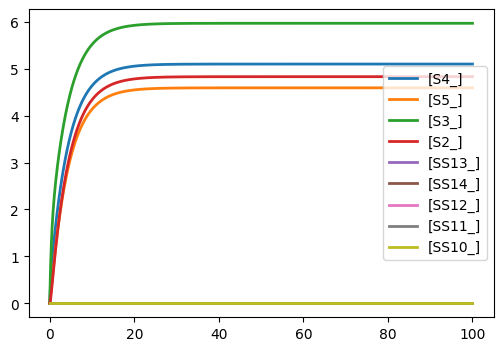

In [43]:
model1_str = makeLtiCrn(num_species=5,
                is_input_boundary=True, 
                num_reaction=10,
                num_products_bounds=(1, 2),
                kinetic_constant_bounds= (0.1, 1),
                stoichiometry_bounds=(1, 3),
                input_species_indices=[1])
model2_str = makeLtiCrn(num_species=5,
                is_input_boundary=False, 
                num_reaction=10,
                num_products_bounds=(1, 2),
                kinetic_constant_bounds= (0.1, 1),
                stoichiometry_bounds=(1, 3),
                starting_species_index=10,
                input_species_indices=[1])
model2_str = model2_str.replace("S", "SS").replace(" k", " kk")
model2_str = model2_str.replace("SS1_", "S1_")
model2_str = model2_str.replace("J", "JJ")
print(model1_str)
print(model2_str)
merged_model_str = mergeModels(model1_str, model2_str)
print(merged_model_str)
rr = te.loada(merged_model_str)
rr.simulate(0, 100, 1000)
rr.plot()

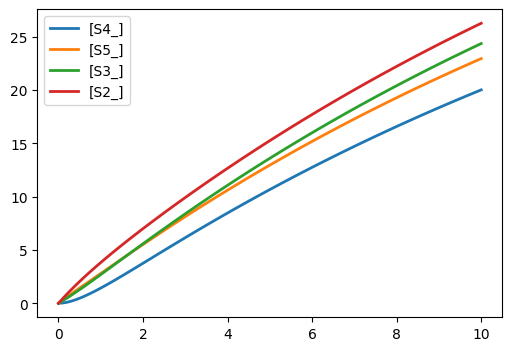

In [19]:
plotModel(model1_str)

In [45]:
rr = te.loada(merged_model_str.replace("$", ""))
rr.getFullJacobian()

             S1_,     S4_,     S5_,     S3_,     S2_,   SS13_,   SS14_,   SS12_,   SS11_, SS10_
S1_   [[ -2.9286,       0,       0,       0,       0,       0,       0,       0,       0,     0],
S4_    [  2.9668, -4.3837,  2.0859,   0.221,  1.7574,       0,       0,       0,       0,     0],
S5_    [  0.7538,       0, -0.4513,   0.221,       0,       0,       0,       0,       0,     0],
S3_    [  4.9012,       0,   0.366, -2.5249,  1.7574,       0,       0,       0,       0,     0],
S2_    [       0,  1.9842,       0,       0, -2.0947,       0,       0,       0,       0,     0],
SS13_  [       0,       0,       0,       0,       0, -1.5773,       0,  0.9846,       0,     0],
SS14_  [       0,       0,       0,       0,       0,       0, -1.2366,       0,    4.84,     0],
SS12_  [       0,       0,       0,       0,       0,       0,       0, -1.7322,       0,     0],
SS11_  [       0,       0,       0,       0,       0,  2.9981,       0,  2.9538, -2.0632,     0],
SS10_  [       0,     

In [21]:
subsystem1 = Subsystem(model_str.replace("$", ""))
subsystem2 = Subsystem(model_str.replace("$", ""))
subsystem = subsystem1.union(subsystem2)